In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix

#### Data Loading and Preliminary Analysis

In [2]:
data = pd.read_csv('penguins.csv')

In [3]:
data.head(3)

,rowid,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,1,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,2,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,3,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   rowid              344 non-null    int64  
 1   species            344 non-null    object 
 2   island             344 non-null    object 
 3   bill_length_mm     342 non-null    float64
 4   bill_depth_mm      342 non-null    float64
 5   flipper_length_mm  342 non-null    float64
 6   body_mass_g        342 non-null    float64
 7   sex                333 non-null    object 
 8   year               344 non-null    int64  
dtypes: float64(4), int64(2), object(3)
memory usage: 24.3+ KB


#### Data Cleaning and PreProcessing

In [5]:
data.isnull().sum()

rowid                 0
species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
year                  0
dtype: int64

In [6]:
data['bill_length_mm'] = data['bill_length_mm'].fillna(data['bill_length_mm'].mean())
data['bill_depth_mm'] = data['bill_depth_mm'].fillna(data['bill_depth_mm'].mean())
data['flipper_length_mm'] = data['flipper_length_mm'].fillna(data['flipper_length_mm'].mean())
data['body_mass_g'] = data['body_mass_g'].fillna(data['body_mass_g'].mean())
data['sex'] = data['sex'].fillna(data['sex'].mode()[0])

In [7]:
data.isnull().sum()

rowid                0
species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
year                 0
dtype: int64

### EDA:

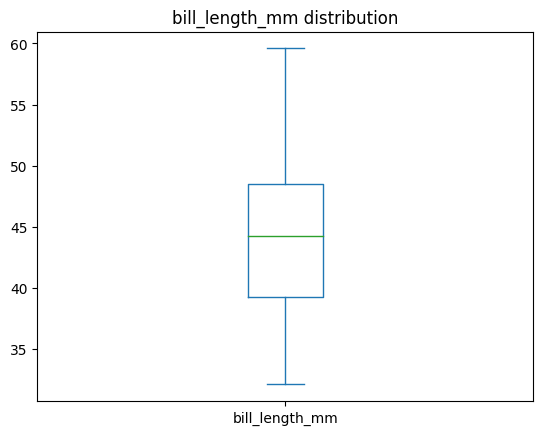

In [8]:
data.plot(y='bill_length_mm', kind = 'box')
plt.title('bill_length_mm distribution')
plt.show()

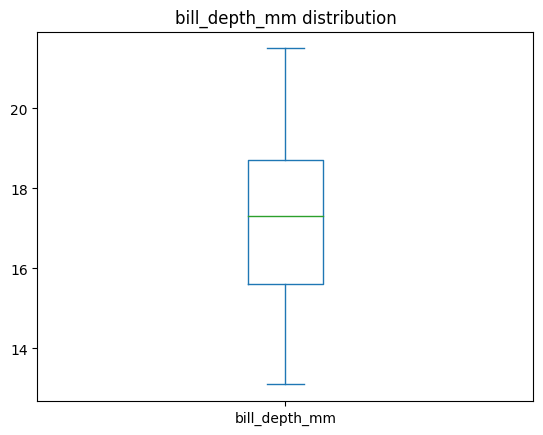

In [9]:
data.plot(y='bill_depth_mm', kind = 'box')
plt.title('bill_depth_mm distribution')
plt.show()

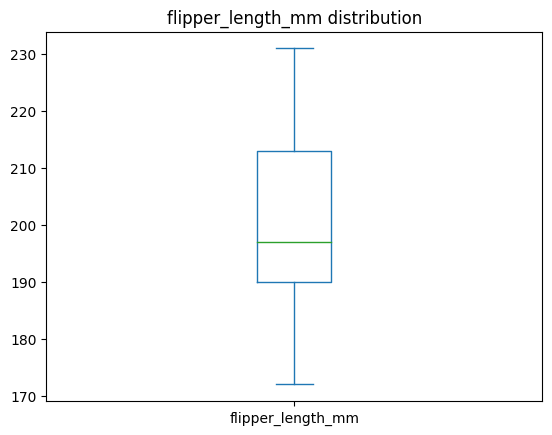

In [10]:
data.plot(y='flipper_length_mm', kind = 'box')
plt.title('flipper_length_mm distribution')
plt.show()

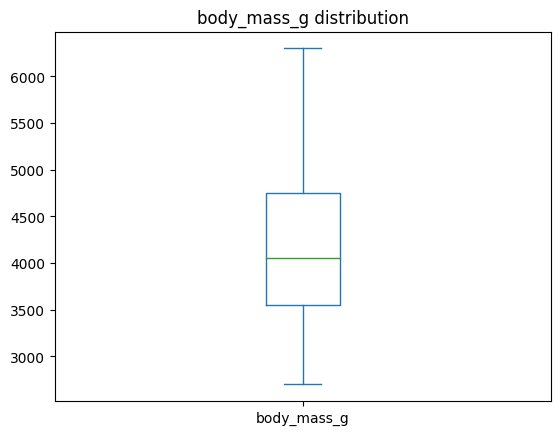

In [11]:
data.plot(y='body_mass_g', kind = 'box')
plt.title('body_mass_g distribution')
plt.show()

Text(0.5, 1.0, 'Bar plot of Species')

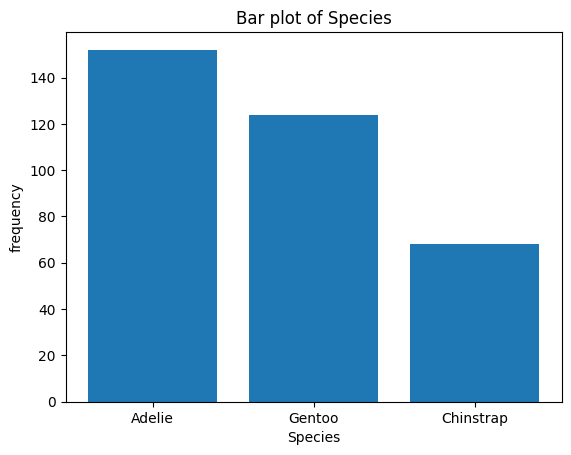

In [12]:
species = list(data['species'].unique())
counts = []
for specimen in species:
    counts.append(data[data['species']==specimen].shape[0])
    
plt.bar(species, counts)
plt.xlabel('Species')
plt.ylabel('frequency')
plt.title('Bar plot of Species')

Text(0.5, 1.0, 'Bar plot of Islands')

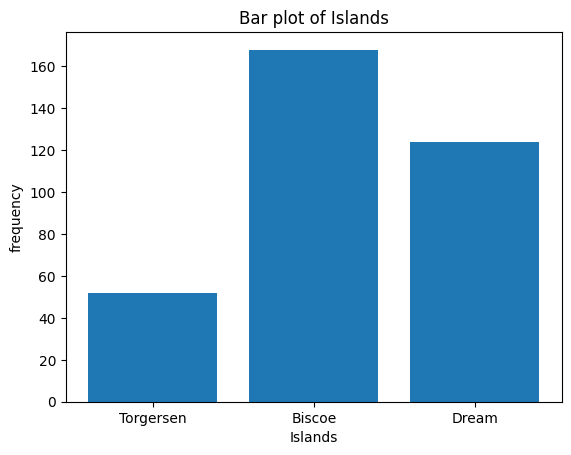

In [13]:
islands = list(data['island'].unique())
counts = []
for island in islands:
    counts.append(data[data['island']==island].shape[0])
    
plt.bar(islands, counts)
plt.xlabel('Islands')
plt.ylabel('frequency')
plt.title('Bar plot of Islands')

Text(0.5, 1.0, 'Bar plot of genders')

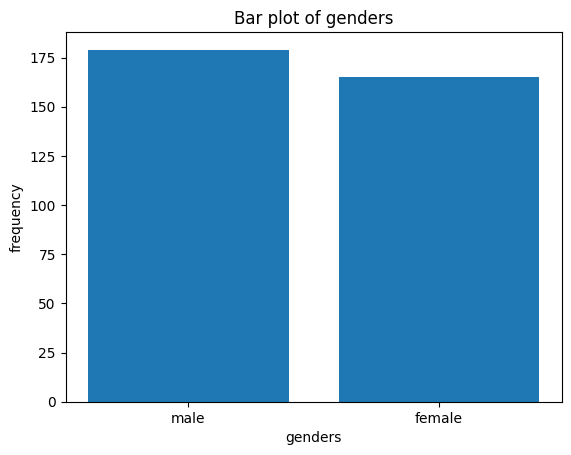

In [14]:
genders = list(data['sex'].unique())
counts = []
for gender in genders:
    counts.append(data[data['sex']==gender].shape[0])
    
plt.bar(genders, counts)
plt.xlabel('genders')
plt.ylabel('frequency')
plt.title('Bar plot of genders')

Text(0.5, 1.0, 'Bar plot of years')

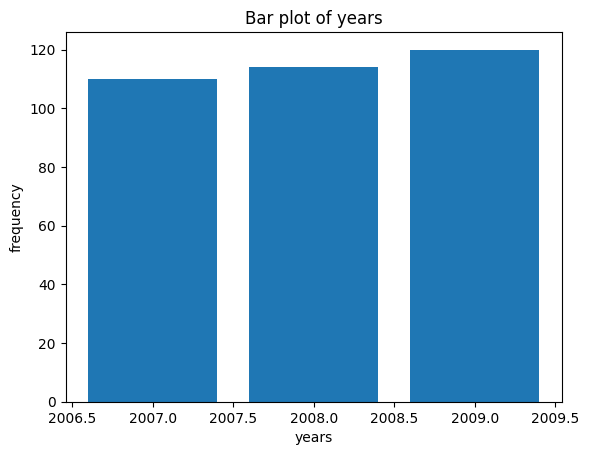

In [15]:
years = list(data['year'].unique())
counts = []
for year in years:
    counts.append(data[data['year']==year].shape[0])
    
plt.bar(years, counts)
plt.xlabel('years')
plt.ylabel('frequency')
plt.title('Bar plot of years')

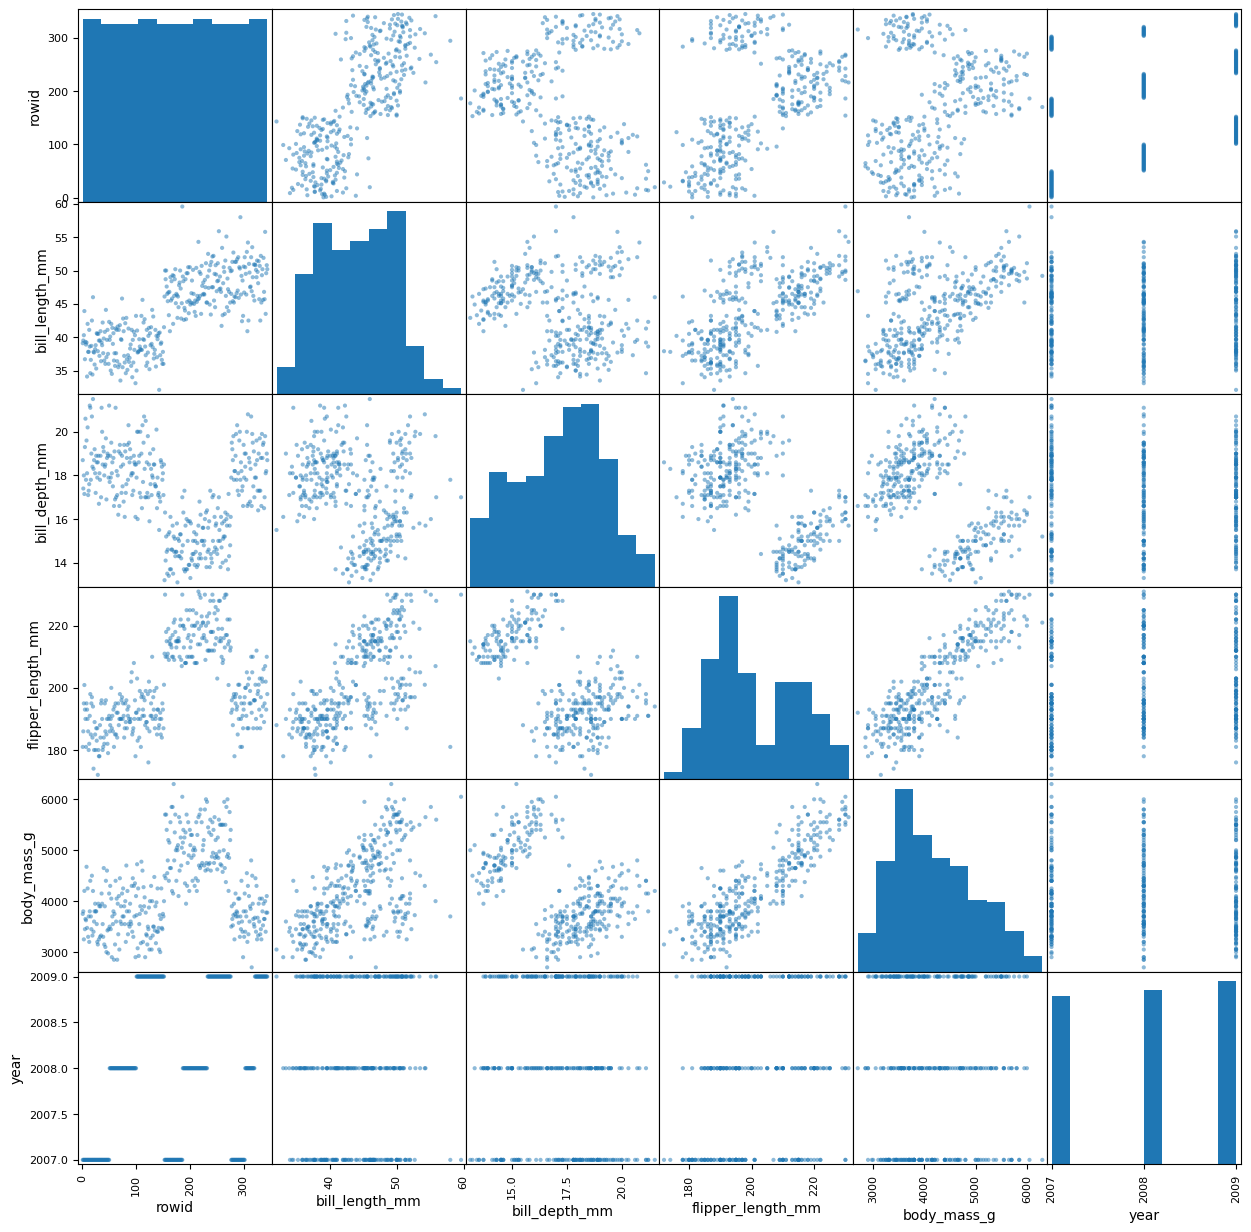

In [16]:
scatter_matrix(data, figsize = (15,15))
plt.show()

### Advanced Statistical Analysis:

In [17]:
# Calculating mean for each attribute in the dataset

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   rowid              344 non-null    int64  
 1   species            344 non-null    object 
 2   island             344 non-null    object 
 3   bill_length_mm     344 non-null    float64
 4   bill_depth_mm      344 non-null    float64
 5   flipper_length_mm  344 non-null    float64
 6   body_mass_g        344 non-null    float64
 7   sex                344 non-null    object 
 8   year               344 non-null    int64  
dtypes: float64(4), int64(2), object(3)
memory usage: 24.3+ KB


In [18]:
mean_vector = np.mean(data[['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g', 'year']], axis=0)
mean_vector

bill_length_mm         43.921930
bill_depth_mm          17.151170
flipper_length_mm     200.915205
body_mass_g          4201.754386
year                 2008.029070
dtype: float64

In [19]:
numerical_data_centered = data[['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g', 'year']] - mean_vector

# covariance using inner product
inner_product = np.dot(numerical_data_centered.T, numerical_data_centered)

cov_matrix_inner = inner_product/(numerical_data_centered.shape[0] - 1)
print("Sample Covariance Matrix using inner product: ")
pd.DataFrame(cov_matrix_inner)

Sample Covariance Matrix using inner product: 


,0,1,2,3,4
0,29.633252,-2.519457,50.082029,2590.398957,0.241926
1,-2.519457,3.877069,-16.118414,-743.012250,-0.096827
2,50.082029,-16.118414,196.578837,9767.130837,1.938332
3,2590.398957,-743.012250,9767.130837,639381.041890,27.499872
4,0.241926,-0.096827,1.938332,27.499872,0.669706


In [20]:
# Covariance using outer product
outer_products = np.outer(numerical_data_centered, numerical_data_centered)

cov_matrix_outer = outer_products/(numerical_data_centered.shape[0] - 1)

print('Sample covariance matrix using outer product: ')
pd.DataFrame(cov_matrix_outer)

Sample covariance matrix using outer product: 


,0,1,2,3,4,5,6,7,8,9,...,1710,1711,1712,1713,1714,1715,1716,1717,1718,1719
0,0.067787,-0.021774,0.279970,6.350810,0.014467,0.062164,-0.003498,0.209680,5.647905,0.014467,...,-0.096693,-0.025991,-0.127715,1.430474,-0.013649,-0.088258,-0.021774,0.040982,5.999358,-0.013649
1,-0.021774,0.006994,-0.089928,-2.039915,-0.004647,-0.019967,0.001124,-0.067350,-1.814138,-0.004647,...,0.031058,0.008348,0.041023,-0.459476,0.004384,0.028349,0.006994,-0.013164,-1.927027,0.004384
2,0.279970,-0.089928,1.156313,26.229682,0.059750,0.256745,-0.014448,0.866004,23.326591,0.059750,...,-0.399353,-0.107346,-0.527480,5.908045,-0.056374,-0.364516,-0.089928,0.169262,24.778137,-0.056374
3,6.350810,-2.039915,26.229682,594.991327,1.355355,5.823983,-0.327727,19.644341,529.137918,1.355355,...,-9.058887,-2.435036,-11.965295,134.017464,-1.278781,-8.268646,-2.039915,3.839523,562.064623,-1.278781
4,0.014467,-0.004647,0.059750,1.355355,0.003087,0.013267,-0.000747,0.044749,1.205345,0.003087,...,-0.020636,-0.005547,-0.027256,0.305284,-0.002913,-0.018835,-0.004647,0.008746,1.280350,-0.002913
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1715,-0.088258,0.028349,-0.364516,-8.268646,-0.018835,-0.080936,0.004554,-0.272999,-7.353476,-0.018835,...,0.125892,0.033840,0.166283,-1.862452,0.017771,0.114910,0.028349,-0.053358,-7.811061,0.017771
1716,-0.021774,0.006994,-0.089928,-2.039915,-0.004647,-0.019967,0.001124,-0.067350,-1.814138,-0.004647,...,0.031058,0.008348,0.041023,-0.459476,0.004384,0.028349,0.006994,-0.013164,-1.927027,0.004384
1717,0.040982,-0.013164,0.169262,3.839523,0.008746,0.037583,-0.002115,0.126766,3.414566,0.008746,...,-0.058458,-0.015713,-0.077213,0.864825,-0.008252,-0.053358,-0.013164,0.024777,3.627045,-0.008252
1718,5.999358,-1.927027,24.778137,562.064623,1.280350,5.501685,-0.309590,18.557227,499.855529,1.280350,...,-8.557570,-2.300281,-11.303138,126.600964,-1.208014,-7.811061,-1.927027,3.627045,530.960076,-1.208014


In [21]:
length_depth_corr = data[['bill_length_mm', 'bill_depth_mm']].corr()
length_depth_corr

,bill_length_mm,bill_depth_mm
bill_length_mm,1.000000,-0.235053
bill_depth_mm,-0.235053,1.000000


In [22]:
centered_data = data[['bill_length_mm', 'bill_depth_mm']] - data[['bill_length_mm', 'bill_depth_mm']].mean()

dot_product = np.dot(centered_data['bill_length_mm'], centered_data['bill_depth_mm'])
norm_v1 = np.linalg.norm(centered_data['bill_length_mm'])
norm_v2 = np.linalg.norm(centered_data['bill_depth_mm'])

correlation = dot_product / (norm_v1 * norm_v2)
print('Correlation between bill_length_mm and bill_depth_mm : ', correlation)

Correlation between bill_length_mm and bill_depth_mm :  -0.23505287035553268


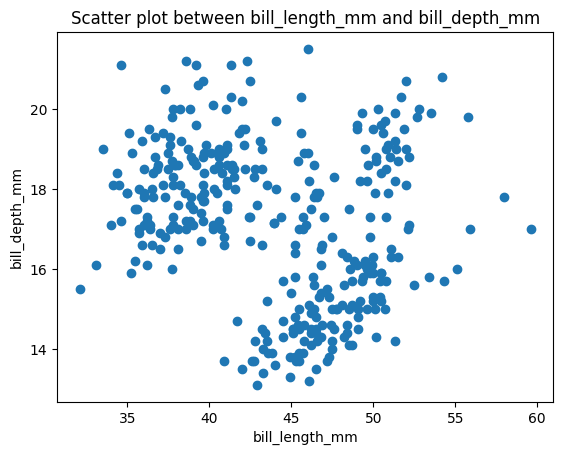

In [23]:
plt.scatter(data['bill_length_mm'], data['bill_depth_mm'])
plt.xlabel('bill_length_mm')
plt.ylabel('bill_depth_mm')
plt.title('Scatter plot between bill_length_mm and bill_depth_mm')
plt.show()

In [24]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
encoded_data = data[['species', 'island', 'sex']].apply(label_encoder.fit_transform)

covariance_matrix = encoded_data.cov()

print("Covariance Matrix of Categorical Attributes:")
print(covariance_matrix)

Covariance Matrix of Categorical Attributes:
          species    island       sex
species  0.798020 -0.412367  0.004577
island  -0.412367  0.527358  0.001051
sex      0.004577  0.001051  0.250314


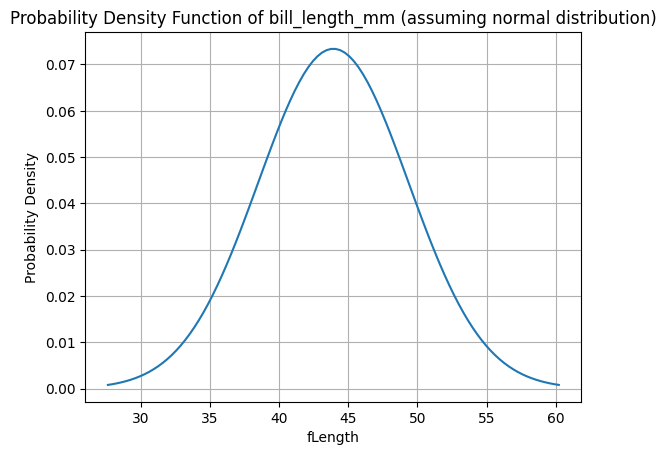

In [25]:
first_attribute_data = data['bill_length_mm']

mean = np.mean(first_attribute_data)
std = np.std(first_attribute_data)

x = np.linspace(mean - 3*std, mean + 3*std, 100)

pdf = 1 / (std * np.sqrt(2 * np.pi)) * np.exp(-(x - mean)**2 / (2 * std**2))

plt.plot(x, pdf)
plt.xlabel("fLength")
plt.ylabel("Probability Density")
plt.title("Probability Density Function of bill_length_mm (assuming normal distribution)")

plt.grid(True)
plt.show()

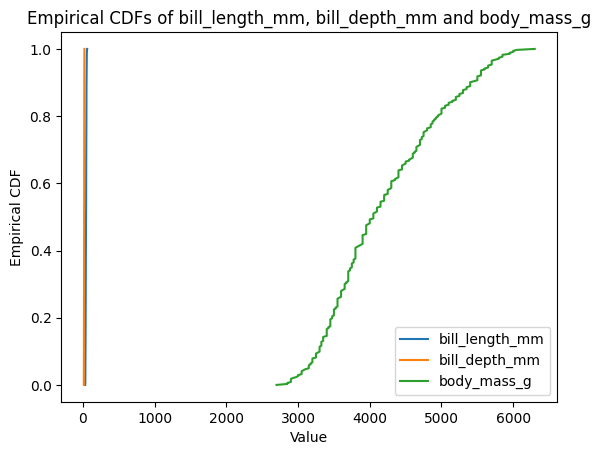

In [26]:
ECDF_data = [data["bill_length_mm"], data["bill_depth_mm"], data["body_mass_g"]]
labels = ["bill_length_mm", "bill_depth_mm", "body_mass_g"]

for i, attribute in enumerate(ECDF_data):
    sorted_data = np.sort(attribute)
    y = np.arange(len(sorted_data)) / float(len(sorted_data) - 1)
    plt.plot(sorted_data, y, label=labels[i])

plt.xlabel("Value")
plt.ylabel("Empirical CDF")
plt.title("Empirical CDFs of bill_length_mm, bill_depth_mm and body_mass_g")
plt.legend()

In [27]:
numerical_data = data[['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g', 'year']]

covariance_matrix = numerical_data.cov()
pd.DataFrame(covariance_matrix)

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year
bill_length_mm,29.633252,-2.519457,50.082029,2590.398957,0.241926
bill_depth_mm,-2.519457,3.877069,-16.118414,-743.012250,-0.096827
flipper_length_mm,50.082029,-16.118414,196.578837,9767.130837,1.938332
body_mass_g,2590.398957,-743.012250,9767.130837,639381.041890,27.499872
year,0.241926,-0.096827,1.938332,27.499872,0.669706


#### Variance Analysis:

From the above covariance matrix, where diagonal values represents variance of the variable, we can see that 'body_mass_g' has higher variance with variance of 639381.041, 'bill_depth_mm' has lower variance with variance of 3.877069 (apart from 'year' which has even lower variance of 0.669706, but 'year' is a categorical variable here, so 'bill_depth_mm' is considered which are numerical values)

#### Covariance Analysis:

From the above covariance matrix, where non-diagonal values represents the covariance between respective attributes, pair ('body_mass_g', 'flipper_length_mm) has higer covariance with a value of 9767.13 and the pair ('body_mass_g', 'bill_depth_mm') has the lowest covariance value of -743.0122.